# 0.1 Setup

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path to project folders

path = r'/Users/joefeuille/CF Analysis/Instacart Basket Analysis'

In [3]:
# Setting exported df from Task 4.9 as file as combo
combo = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'combo_df_2.pkl'))

# 0.2 DF Check

In [4]:
combo.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_ordering,product_id,add_to_cart_order,...,first_name,last_name,gender,state,age,date_joined,number_dependants,family_status,income,_merge
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,True,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,False,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,False,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,False,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,False,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both


In [5]:
combo.shape

(32435070, 36)

In [6]:
combo.dtypes

order_id                   float64
user_id                    float64
eval_set                    object
order_number               float64
orders_day_of_week         float64
order_time_of_day          float64
days_since_prior_order     float64
first_time_ordering         object
product_id                   int64
add_to_cart_order          float64
reordered                  float64
product_name                object
aisle_id                   float64
department_id              float64
prices                     float64
merge_check_1             category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                  float64
loyalty_flag                object
spending                   float64
type_of_spender             object
order_freq                 float64
frequency_flag              object
first_name                  object
last_name                   object
gender              

###  Import checks out. Proceed with project.

# Q.2 - Consider any security implications that might exist for this data. Address any PII data in the data before continuing your analysis.

### Any information that can be traced back directly to a specific customer needs to be removed. Last names, certainly. Possibly first names too. And possibly income levels.

### Thankfully, our records do not include any customer cities of specific addresses.

In [6]:
# Pulling records for a few specific first names as a privacy check.

sdf_linda = combo.loc[combo['first_name'] == 'Linda']

In [7]:
sdf_linda.shape

(220294, 36)

In [8]:
sdf_linda.head(20)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_ordering,product_id,add_to_cart_order,...,first_name,last_name,gender,state,age,date_joined,number_dependants,family_status,income,_merge
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,True,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,False,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,False,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,False,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,False,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
5,3367565.0,1.0,prior,6.0,2.0,7.0,19.0,False,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
6,550135.0,1.0,prior,7.0,1.0,9.0,20.0,False,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
7,3108588.0,1.0,prior,8.0,1.0,14.0,14.0,False,196,2.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
8,2295261.0,1.0,prior,9.0,1.0,16.0,0.0,False,196,4.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
9,2550362.0,1.0,prior,10.0,4.0,8.0,30.0,False,196,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both


In [9]:
# Checking for multiple last names for all customers with first name "Linda"

sdf_linda['last_name'].value_counts()

Graves      37328
Barnett     35891
Ali         31530
Castillo    31474
Nguyen      31236
Cherry      29761
Duncan      23074
Name: last_name, dtype: int64

In [10]:
# Checking for user id numbers for all customers with first name "Linda"

sdf_linda['user_id'].value_counts()

115495.0    2223
152551.0    1461
39832.0     1348
71579.0     1208
174711.0    1132
            ... 
99298.0        5
179643.0       5
37404.0        4
164320.0       4
71587.0        4
Name: user_id, Length: 1433, dtype: int64

In [11]:
# Checking for multiple states for all customers with first name "Linda"

sdf_linda['state'].value_counts()

New Mexico              7525
Colorado                7250
Oklahoma                7089
New Jersey              6853
Minnesota               6592
Florida                 6504
Tennessee               5470
District of Columbia    5244
Virginia                5140
Illinois                5129
Alabama                 5090
Indiana                 5025
North Dakota            5010
Pennsylvania            4941
Texas                   4849
South Carolina          4817
Louisiana               4686
Utah                    4678
Arkansas                4668
New York                4661
Iowa                    4621
Oregon                  4610
Nevada                  4512
California              4473
Wyoming                 4436
Georgia                 4329
Michigan                4319
Missouri                4297
Washington              4284
Connecticut             4203
Vermont                 4177
Montana                 4162
Delaware                3935
New Hampshire           3839
Arizona       

### That's actually a far larger number of state counts than I would have anticipated for just seven last names.

In [12]:
# Exporting sub-df Linda to csv to peruse with Excel

sdf_linda.to_clipboard()

### After viewing sdf Linda in excel, removing First &  Last Name column seems sufficient for privacy.


### Will double check with data team as well.

In [8]:
# Creating new df (combo2) without first or last names

combo2 = combo.drop(columns = ['first_name', 'last_name'])

# Q.3 - The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. 

### Determine whether there’s a difference in spending habits between the different U.S. regions.

In [9]:
# Creating filter using else/if for each region

region = []

for state in combo2['state']:
    if (state == 'Maine') or (state == 'New Hampshire') or (state == 'Vermont') or (state == 'Massachusetts') or (state == 'Rhode Island') or (state == 'Connecticut') or (state == 'New York') or (state == 'Pennsylvania') or (state == 'New Jersey'):
        region.append('Northeast')
    elif (state == 'Wisconsin') or (state == 'Michigan') or (state == 'Illinois') or (state == 'Indiana') or (state == 'Ohio') or (state == 'North Dakota') or (state == 'South Dakota') or (state == 'Nebraska') or (state == 'Kansas') or (state == 'Minnesota') or (state == 'Iowa') or (state == 'Missouri'):
        region.append('Midwest')
    elif (state == 'Delaware') or (state == 'Maryland') or (state == 'District of Columbia') or (state == 'Virginia') or (state == 'West Virginia') or (state == 'North Carolina') or (state == 'South Carolina') or (state == 'Georgia') or (state == 'Florida') or (state == 'Kentucky') or (state == 'Tennessee') or (state == 'Mississippi') or (state == 'Alabama') or (state == 'Oklahoma') or (state == 'Texas') or (state == 'Arkansas') or (state == 'Louisiana'):
        region.append('South')
    elif (state == 'Idaho') or (state == 'Montana') or (state == 'Wyoming') or (state == 'Nevada') or (state == 'Utah') or (state == 'Colorado') or (state == 'Arizona') or (state == 'New Mexico') or (state == 'Alaska') or (state == 'Washington') or (state == 'Oregon') or (state == 'California') or (state == 'Hawaii'):
        region.append('West')
    else:
        region.append('Stateless')

In [10]:
# Assigning "region" values to new column

combo2['regions'] = region

In [11]:
# Checking Regions value counts

combo2['regions'].value_counts()

South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
Stateless          11
Name: regions, dtype: int64

In [12]:
combo2.tail(15)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_ordering,product_id,add_to_cart_order,...,frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income,_merge,regions
32435055,484769.0,66343.0,prior,1.0,6.0,11.0,NaN,True,47210,1.0,...,Non-frequent customer,Female,Tennessee,22.0,9/12/2017,3.0,married,46151.0,both,South
32435056,1561557.0,66343.0,prior,2.0,1.0,11.0,30.0,False,47210,1.0,...,Non-frequent customer,Female,Tennessee,22.0,9/12/2017,3.0,married,46151.0,both,South
32435057,276317.0,66343.0,prior,3.0,6.0,15.0,19.0,False,47210,1.0,...,Non-frequent customer,Female,Tennessee,22.0,9/12/2017,3.0,married,46151.0,both,South
32435058,2922475.0,66343.0,prior,4.0,1.0,12.0,30.0,False,47210,1.0,...,Non-frequent customer,Female,Tennessee,22.0,9/12/2017,3.0,married,46151.0,both,South
32435059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3630,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Stateless
32435060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3718,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Stateless
32435061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7045,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Stateless
32435062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25383,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Stateless
32435063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27499,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Stateless
32435064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36233,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Stateless


### Those eleven rows marked as "Stateless" correspond to the 11 items in product inventory that have never been purchased.

### Else/if loop was a success!

In [18]:
# Creating a crosstab to examine spending habits per region (regions v. type_of_spender)

crosstab = pd.crosstab(combo2['regions'], combo2['type_of_spender'], dropna = False)

In [19]:
# Copying new crosstab to clipboard for evaluation in excel

crosstab.to_clipboard()

In [20]:
crosstab

type_of_spender,High spender,Low spender
regions,,
Midwest,156055,7447961
Northeast,108269,5620175
South,209824,10592158
West,160402,8140215


# Result:

### Regions	   // High spender // Low spender
### Midwest	 // 156,055           //   7,447,961
### Northeast// 108,269          //   5,620,175
### South      //  209,824          // 10,592,158
### West	   //   160,402         //    8,140,215

# Calculations:

### Regions	   // Percent H.S. // Percent L.S.
### Midwest	 //   2.05%           //   97.95%
### Northeast//   1.89%          //   98.11%
### South      //    1.94%          //   98.06%
### West	   //     1.93%         //    98.07%

# Description:

### All four regions have more low spenders than high spenders, which is predictable. However, the regions (as defined) all have a different number of states, and therefore regional populations vary widely. The Northeast has the lowest number of total customers with 5,728,444, while the South has the highest number of total customers with 10,801,982.

### Using our total population for each region, we can normalize customer spending habits as a percentage. Surprisingly, the Midwest is the region with the LARGEST PERCENTAGE OF HIGH SPENDERS at 2.05%. The Northeast has the lowest number of total customers, but the largest percentage of low spenders at 98.11%.

### The raw data for High Spender/Low Spender can be deceiving. Therefore, it was important to calculate percentages based on the total number of customers for each region.

# Q.4 - Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [13]:
# Creating exclusion flag for customers with less than 5 orders using "Max Order"

combo2.loc[combo2['max_order'] < 5, 'exclusion_flag'] = 'Low-activity Customer'

In [14]:
# Creating complimentary flag for "High-activity customers"

combo2.loc[combo2['max_order'] >= 5, 'exclusion_flag'] = 'High-activity Customer'

In [11]:
combo2.head(20)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_ordering,product_id,add_to_cart_order,...,gender,state,age,date_joined,number_dependants,family_status,income,_merge,regions,exclusion_flag
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,True,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,False,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,False,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,False,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,False,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
5,3367565.0,1.0,prior,6.0,2.0,7.0,19.0,False,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
6,550135.0,1.0,prior,7.0,1.0,9.0,20.0,False,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
7,3108588.0,1.0,prior,8.0,1.0,14.0,14.0,False,196,2.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
8,2295261.0,1.0,prior,9.0,1.0,16.0,0.0,False,196,4.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
9,2550362.0,1.0,prior,10.0,4.0,8.0,30.0,False,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer


In [15]:
combo2['exclusion_flag'].value_counts(dropna = False)

High-activity Customer    30993489
Low-activity Customer      1441570
NaN                             11
Name: exclusion_flag, dtype: int64

In [16]:
# Creating new df for ONLY Low-activity Customers

low_act_combo = combo2[combo2['exclusion_flag'] == 'Low-activity Customer']

In [26]:
low_act_combo.head(10)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_ordering,product_id,add_to_cart_order,...,gender,state,age,date_joined,number_dependants,family_status,income,_merge,regions,exclusion_flag
1560,2040988.0,195.0,prior,1.0,1.0,14.0,NaN,True,196,2.0,...,Female,South Dakota,50.0,6/17/2017,2.0,married,70952.0,both,Midwest,Low-activity Customer
1561,1680569.0,195.0,prior,8.0,1.0,9.0,4.0,False,196,2.0,...,Female,South Dakota,50.0,6/17/2017,2.0,married,70952.0,both,Midwest,Low-activity Customer
1562,276171.0,195.0,prior,19.0,5.0,11.0,3.0,False,196,2.0,...,Female,South Dakota,50.0,6/17/2017,2.0,married,70952.0,both,Midwest,Low-activity Customer
1563,2744976.0,195.0,prior,22.0,5.0,10.0,7.0,False,196,2.0,...,Female,South Dakota,50.0,6/17/2017,2.0,married,70952.0,both,Midwest,Low-activity Customer
1564,2781919.0,195.0,prior,25.0,1.0,14.0,4.0,False,196,1.0,...,Female,South Dakota,50.0,6/17/2017,2.0,married,70952.0,both,Midwest,Low-activity Customer
1565,1738718.0,195.0,prior,31.0,2.0,8.0,4.0,False,196,2.0,...,Female,South Dakota,50.0,6/17/2017,2.0,married,70952.0,both,Midwest,Low-activity Customer
1566,3058369.0,195.0,prior,34.0,3.0,10.0,6.0,False,196,2.0,...,Female,South Dakota,50.0,6/17/2017,2.0,married,70952.0,both,Midwest,Low-activity Customer
1567,1485596.0,195.0,prior,37.0,2.0,15.0,0.0,False,196,2.0,...,Female,South Dakota,50.0,6/17/2017,2.0,married,70952.0,both,Midwest,Low-activity Customer
1568,417035.0,195.0,prior,40.0,3.0,16.0,2.0,False,196,2.0,...,Female,South Dakota,50.0,6/17/2017,2.0,married,70952.0,both,Midwest,Low-activity Customer
1569,1615297.0,195.0,prior,47.0,5.0,10.0,2.0,False,196,2.0,...,Female,South Dakota,50.0,6/17/2017,2.0,married,70952.0,both,Midwest,Low-activity Customer


In [17]:
# Creating new df for ONLY High-activity Customers

hi_act_combo = combo2[combo2['exclusion_flag'] == 'High-activity Customer']

In [44]:
hi_act_combo.head(10)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_ordering,product_id,add_to_cart_order,...,gender,state,age,date_joined,number_dependants,family_status,income,_merge,regions,exclusion_flag
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,True,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,False,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,False,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,False,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,False,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
5,3367565.0,1.0,prior,6.0,2.0,7.0,19.0,False,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
6,550135.0,1.0,prior,7.0,1.0,9.0,20.0,False,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
7,3108588.0,1.0,prior,8.0,1.0,14.0,14.0,False,196,2.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
8,2295261.0,1.0,prior,9.0,1.0,16.0,0.0,False,196,4.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer
9,2550362.0,1.0,prior,10.0,4.0,8.0,30.0,False,196,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer


In [45]:
# Exporting new activity-level dfs

low_act_combo.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))
hi_act_combo.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [30]:
# Creating and exporting small df for those 11 unpurchased items, using the "Stateless" flag

unpurchased_combo = combo2[combo2['regions'] == 'Stateless']
unpurchased_combo.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'unpurchased_items_combo.pkl'))

# Q.5 - The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database.

## Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

## You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

In [18]:
# Creating new df (cust_combo) for all customer data w/o unpurchased products

cust_combo = combo2[combo2.regions != 'Stateless']

In [14]:
cust_combo.tail()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_ordering,product_id,add_to_cart_order,...,gender,state,age,date_joined,number_dependants,family_status,income,_merge,regions,exclusion_flag
32435054,156685.0,106143.0,prior,26.0,4.0,23.0,5.0,False,19675,1.0,...,Male,Hawaii,25.0,5/26/2017,0.0,single,53755.0,both,West,High-activity Customer
32435055,484769.0,66343.0,prior,1.0,6.0,11.0,NaN,True,47210,1.0,...,Female,Tennessee,22.0,9/12/2017,3.0,married,46151.0,both,South,Low-activity Customer
32435056,1561557.0,66343.0,prior,2.0,1.0,11.0,30.0,False,47210,1.0,...,Female,Tennessee,22.0,9/12/2017,3.0,married,46151.0,both,South,Low-activity Customer
32435057,276317.0,66343.0,prior,3.0,6.0,15.0,19.0,False,47210,1.0,...,Female,Tennessee,22.0,9/12/2017,3.0,married,46151.0,both,South,Low-activity Customer
32435058,2922475.0,66343.0,prior,4.0,1.0,12.0,30.0,False,47210,1.0,...,Female,Tennessee,22.0,9/12/2017,3.0,married,46151.0,both,South,Low-activity Customer


In [30]:
# Exporting new cust_combo df for future use

cust_combo.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_combo_df.pkl'))

In [16]:
cust_combo['number_dependants'].value_counts()

3.0    8142515
0.0    8105345
2.0    8098734
1.0    8088465
Name: number_dependants, dtype: int64

In [17]:
cust_combo['department_id'].value_counts()

4.0     9479291
16.0    5398747
19.0    2887550
7.0     2688123
1.0     2234743
13.0    1875369
3.0     1172428
15.0    1068058
20.0    1051249
9.0      866627
17.0     738666
12.0     708927
14.0     703033
11.0     447572
18.0     423802
6.0      269253
5.0      153696
8.0       97716
21.0      69145
2.0       36291
10.0      34573
Name: department_id, dtype: int64

In [18]:
# Creating Crosstab for each pair of variables, starting with age & income

xtb_age_income = pd.crosstab(cust_combo['age'], cust_combo['income'], dropna = False)

In [19]:
xtb_age_income.to_clipboard()

In [20]:
# Creating Crosstab for age & dept id

xtb_age_dept = pd.crosstab(cust_combo['age'], cust_combo['department_id'], dropna = False)
xtb_age_dept.to_clipboard()

In [21]:
# Creating Crosstab for age & family status

xtb_age_fam = pd.crosstab(cust_combo['age'], cust_combo['family_status'], dropna = False)
xtb_age_fam.to_clipboard()

In [22]:
# Creating Crosstab for age & dependants

xtb_age_depend = pd.crosstab(cust_combo['age'], cust_combo['number_dependants'], dropna = False)
xtb_age_depend.to_clipboard()

In [23]:
# Creating Crosstab for age & order TOD

xtb_age_ord_tod = pd.crosstab(cust_combo['age'], cust_combo['order_time_of_day'], dropna = False)
xtb_age_ord_tod.to_clipboard()

In [25]:
# Creating Crosstab for age & order DOW

xtb_age_ord_dow = pd.crosstab(cust_combo['age'], cust_combo['orders_day_of_week'], dropna = False)
xtb_age_ord_dow.to_clipboard()

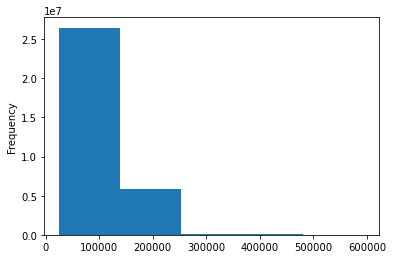

In [28]:
# Creating histogram for customer income levels

hist_incm = cust_combo['income'].plot.hist(bins = 5)

In [7]:
# Creating filter for income brackets

cust_combo.loc[cust_combo['income'] < 100000, 'income_range'] = '0 - 100k'
cust_combo.loc[(cust_combo['income'] >= 100000) & (cust_combo['income'] < 200000), 'income_range'] = '100-200k'
cust_combo.loc[(cust_combo['income'] >= 200000) & (cust_combo['income'] < 300000), 'income_range'] = '200-300k'
cust_combo.loc[(cust_combo['income'] >= 300000) & (cust_combo['income'] < 400000), 'income_range'] = '300-400k'
cust_combo.loc[(cust_combo['income'] >= 400000) & (cust_combo['income'] < 500000), 'income_range'] = '400-500k'
cust_combo.loc[cust_combo['income'] >= 500000, 'income_range'] = 'Over 500k'

In [30]:
# Creating Crosstab for income & dept id

xtb_incm_dept = pd.crosstab(cust_combo['income_range'], cust_combo['department_id'], dropna = False)
xtb_incm_dept.to_clipboard()

In [121]:
# Creating Crosstab for income & family status

xtb_incm_fam = pd.crosstab(cust_combo['income_range'], cust_combo['family_status'], dropna = False)
xtb_incm_fam.to_clipboard()

In [33]:
# Creating Crosstab for income & dependants

xtb_incm_depend = pd.crosstab(cust_combo['income_range'], cust_combo['number_dependants'], dropna = False)
xtb_incm_depend.to_clipboard()

In [34]:
# Creating Crosstab for income & order TOD

xtb_incm_ord_tod = pd.crosstab(cust_combo['income_range'], cust_combo['order_time_of_day'], dropna = False)
xtb_incm_ord_tod.to_clipboard()

In [35]:
# Creating Crosstab for income & order DOW

xtb_incm_ord_dow = pd.crosstab(cust_combo['income_range'], cust_combo['orders_day_of_week'], dropna = False)
xtb_incm_ord_dow.to_clipboard()

In [36]:
# Creating Crosstab for income & order frequency

xtb_incm_ord_freq = pd.crosstab(cust_combo['income_range'], cust_combo['frequency_flag'], dropna = False)
xtb_incm_ord_freq.to_clipboard()

In [37]:
# Creating Crosstab for number of dependants & order frequency

xtb_depend_ord_freq = pd.crosstab(cust_combo['number_dependants'], cust_combo['frequency_flag'], dropna = False)
xtb_depend_ord_freq.to_clipboard()

In [39]:
# Creating Crosstab for number of dependants & order TOD

xtb_depend_ord_tod = pd.crosstab(cust_combo['number_dependants'], cust_combo['order_time_of_day], dropna = False)
xtb_depend_ord_tod.to_clipboard()

In [40]:
# Creating Crosstab for number of dependants & order DOW

xtb_depend_ord_dow = pd.crosstab(cust_combo['number_dependants'], cust_combo['orders_day_of_week'], dropna = False)
xtb_depend_ord_dow.to_clipboard()

In [41]:
# Creating Crosstab for number of dependants & family status

xtb_depend_fam = pd.crosstab(cust_combo['number_dependants'], cust_combo['family_status'], dropna = False)
xtb_depend_fam.to_clipboard()

### Creating additional profiling variables:
#### - parent flag
#### - age categories (in 10s)

In [8]:
# Creating filter for parental status

cust_combo.loc[cust_combo['number_dependants'] > 0, 'parental_status'] = 'Parent'
cust_combo.loc[cust_combo['number_dependants'] <= 0, 'parental_status'] = 'Not Parent'

In [9]:
# Creating filter for age categories, in tens of years

cust_combo.loc[cust_combo['age'] < 20, 'age_range'] = '18-19'
cust_combo.loc[(cust_combo['age'] >= 20) & (cust_combo['age'] < 30), 'age_range'] = '20s'
cust_combo.loc[(cust_combo['age'] >= 30) & (cust_combo['age'] < 40), 'age_range'] = '30s'
cust_combo.loc[(cust_combo['age'] >= 40) & (cust_combo['age'] < 50), 'age_range'] = '40s'
cust_combo.loc[(cust_combo['age'] >= 50) & (cust_combo['age'] < 60), 'age_range'] = '50s'
cust_combo.loc[(cust_combo['age'] >= 60) & (cust_combo['age'] < 70), 'age_range'] = '60s'
cust_combo.loc[(cust_combo['age'] >= 70) & (cust_combo['age'] < 80), 'age_range'] = '70s'
cust_combo.loc[cust_combo['age'] >= 80, 'age_range'] = '80 and up'

In [47]:
cust_combo.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_ordering,product_id,add_to_cart_order,...,date_joined,number_dependants,family_status,income,_merge,regions,exclusion_flag,income_range,age_range,parental_status
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,True,196,1.0,...,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer,Under 100k,30s,Parent
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,False,196,1.0,...,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer,Under 100k,30s,Parent
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,False,196,1.0,...,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer,Under 100k,30s,Parent
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,False,196,1.0,...,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer,Under 100k,30s,Parent
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,False,196,1.0,...,2/17/2019,3.0,married,40423.0,both,South,High-activity Customer,Under 100k,30s,Parent


In [48]:
cust_combo.tail()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_time_ordering,product_id,add_to_cart_order,...,date_joined,number_dependants,family_status,income,_merge,regions,exclusion_flag,income_range,age_range,parental_status
32435054,156685.0,106143.0,prior,26.0,4.0,23.0,5.0,False,19675,1.0,...,5/26/2017,0.0,single,53755.0,both,West,High-activity Customer,Under 100k,20s,Not Parent
32435055,484769.0,66343.0,prior,1.0,6.0,11.0,NaN,True,47210,1.0,...,9/12/2017,3.0,married,46151.0,both,South,Low-activity Customer,Under 100k,20s,Parent
32435056,1561557.0,66343.0,prior,2.0,1.0,11.0,30.0,False,47210,1.0,...,9/12/2017,3.0,married,46151.0,both,South,Low-activity Customer,Under 100k,20s,Parent
32435057,276317.0,66343.0,prior,3.0,6.0,15.0,19.0,False,47210,1.0,...,9/12/2017,3.0,married,46151.0,both,South,Low-activity Customer,Under 100k,20s,Parent
32435058,2922475.0,66343.0,prior,4.0,1.0,12.0,30.0,False,47210,1.0,...,9/12/2017,3.0,married,46151.0,both,South,Low-activity Customer,Under 100k,20s,Parent


# Q.6 - Create an appropriate visualization to show the distribution of profiles.

In [57]:
# Crosstab for parental status and shopping day of week for visualization

xtb_parent_ord_dow2 = pd.crosstab(cust_combo['orders_day_of_week'], cust_combo['parental_status'], dropna = False)
xtb_parent_ord_dow2.to_clipboard()

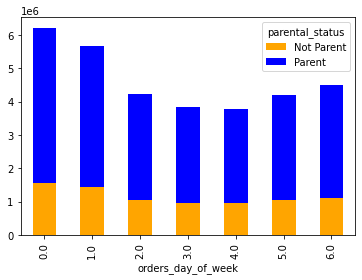

In [58]:
# Creating a visualization of parents/non-parents and their DOW shopping preferences (Second attempt)

bar_parent_dow2 = xtb_parent_ord_dow2.plot.bar(stacked = True, color = ['orange', 'blue'])
plt.legend(title = 'parental_status')

In [145]:
bar_parent_dow2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-parent_dayofweek.png'))



In [59]:
# Crosstab for parental status and shopping time of day

xtb_parent_ord_tod = pd.crosstab(cust_combo['order_time_of_day'], cust_combo['parental_status'], dropna = False)

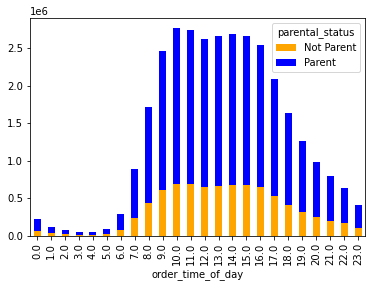

In [60]:
# Creating a visualization of parents/non-parents and their TOD shopping preferences

bar_parent_tod = xtb_parent_ord_tod.plot.bar(stacked = True, color = ['orange', 'blue'])
plt.legend(title = 'parental_status')

In [146]:
bar_parent_tod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-parent_timeofday.png'))



In [84]:
# Crosstab for parental status and age range

xtb_parent_age = pd.crosstab(cust_combo['age_range'], cust_combo['parental_status'], dropna = False)

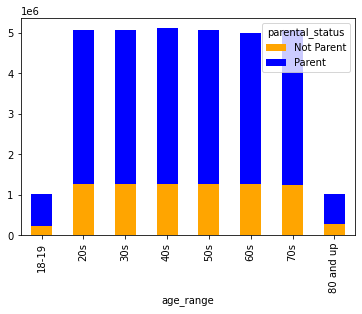

In [85]:
# Creating a visualization of parents/non-parents and age

bar_parent_age = xtb_parent_age.plot.bar(stacked = True, color = ['orange', 'blue'])
plt.legend(title = 'parental_status')

In [147]:
bar_parent_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-parent_age.png'))



In [10]:
# Crosstab for age range and frequency flag

xtb_age_freq = pd.crosstab(cust_combo['age_range'], cust_combo['frequency_flag'], dropna = False)

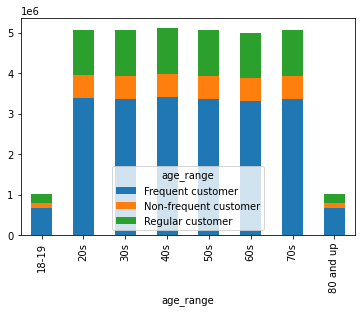

In [11]:
# Creating a visualization of parents/non-parents and age

bar_age_freq = xtb_age_freq.plot.bar(stacked = True)
plt.legend(title = 'age_range')

In [148]:
bar_age_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-age_freq.png'))



In [89]:
# Crosstab for age range and region

xtb_age_reg = pd.crosstab(cust_combo['age_range'], cust_combo['regions'], dropna = False).sort_index(axis = 1, ascending = True)

regions,Midwest,Northeast,South,West
age_range,,,,
18-19,226847,184327,344422,265501
20s,1195069,887344,1710240,1282535
30s,1181675,889630,1724542,1282356
40s,1228206,901072,1678475,1306291
50s,1200631,891061,1655297,1322159
60s,1162469,885420,1666028,1278225
70s,1164772,910452,1697945,1286604
80 and up,244347,179138,325033,276946


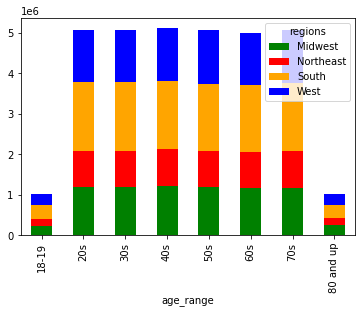

In [134]:
# Creating a visualization of age range and regions

bar_age_reg = xtb_age_reg.plot.bar(stacked = True, color = ['green', 'red', 'orange', 'blue'])
plt.legend(title = 'regions')
xtb_age_reg


In [149]:
bar_age_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-age_region.png'))



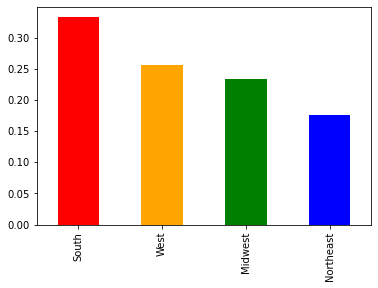

In [118]:
# Bar chart of count of orders by region

bar_regions = cust_combo['regions'].value_counts('order_id').plot.bar(color = ['red', 'orange', 'green', 'blue'])

In [150]:
bar_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-regions.png'))



income_range,0 - 100k,100-200k,200-300k,300-400k,400-500k,Over 500k
family_status,,,,,,
divorced/widowed,844742,1904940,17188,2046,4229,1315
living with parents and siblings,1503192,44848,2080,2095,0,0
married,11722306,10866350,116753,36879,20334,14877
single,3537074,1752960,20952,12959,3776,3164


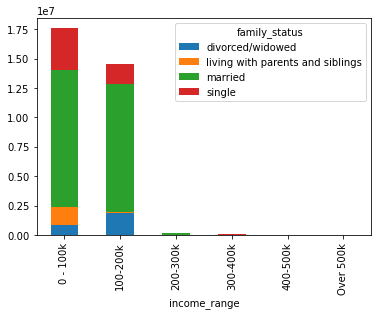

In [126]:
bar_incm_fam2 = xtb_incm_fam.plot.bar(stacked = True)
xtb_incm_fam_T

In [151]:
bar_incm_fam2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-income_famstat.png'))



In [136]:
# Crosstab for family status and order TOD

xtb_ord_tod_fam = pd.crosstab(cust_combo['order_time_of_day'], cust_combo['family_status'], dropna = False)

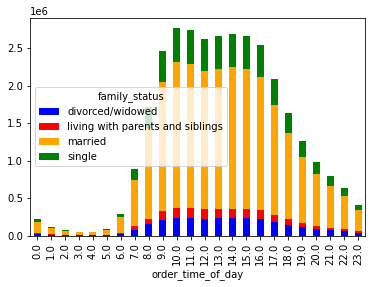

In [137]:
bar_tod_fam = xtb_ord_tod_fam.plot.bar(stacked = True, color = ['blue', 'red', 'orange', 'green'])

In [152]:
bar_tod_fam.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-timeofday_famstat.png'))



In [138]:
# Crosstab for dependants and order TOD

xtb_ord_tod_depend = pd.crosstab(cust_combo['order_time_of_day'], cust_combo['number_dependants'], dropna = False)

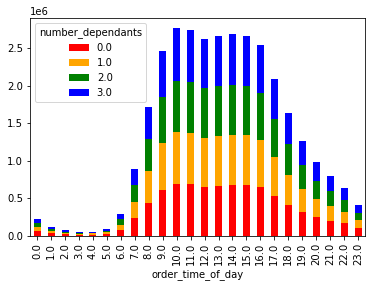

In [140]:
bar_tod_depend = xtb_ord_tod_depend.plot.bar(stacked = True, color = ['red', 'orange', 'green', 'blue'])

In [153]:
bar_tod_depend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-timeofday_dependants.png'))



In [127]:
# Crosstab for dept id & region

xtb_dept_reg = pd.crosstab(cust_combo['department_id'], cust_combo['regions'], dropna = False)

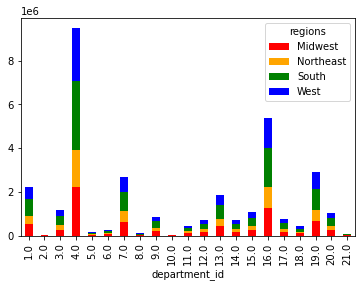

In [129]:
bar_dept_reg = xtb_dept_reg.plot.bar(stacked = True, color = ['red', 'orange', 'green', 'blue'])

In [154]:
bar_dept_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-dept_regions.png'))



In [130]:
# Crosstab for order TOD & region

xtb_ord_tod_reg = pd.crosstab(cust_combo['order_time_of_day'], cust_combo['regions'], dropna = False)

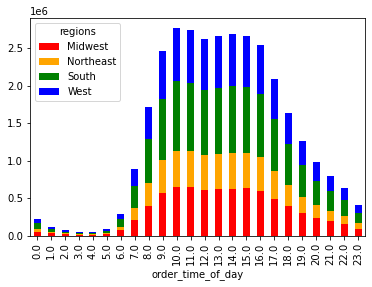

In [131]:
bar_tod_reg = xtb_ord_tod_reg.plot.bar(stacked = True, color = ['red', 'orange', 'green', 'blue'])

In [155]:
bar_tod_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-timeofday_region.png'))

In [132]:
# Crosstab for order DOW & region

xtb_ord_dow_reg = pd.crosstab(cust_combo['orders_day_of_week'], cust_combo['regions'], dropna = False)

regions,Midwest,Northeast,South,West
orders_day_of_week,,,,
0.0,1461375,1098368,2054647,1595418
1.0,1322096,1000960,1893964,1448931
2.0,992703,746910,1405975,1072280
3.0,895933,679971,1288524,979747
4.0,888939,666993,1259634,971697
5.0,984045,747228,1401071,1077259
6.0,1058925,788014,1498167,1155285


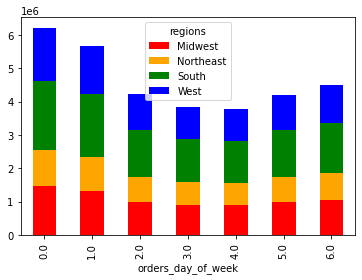

In [135]:
bar_dow_reg = xtb_ord_dow_reg.plot.bar(stacked = True, color = ['red', 'orange', 'green', 'blue'])
xtb_ord_dow_reg

In [156]:
bar_dow_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-dayofweek_region.png'))

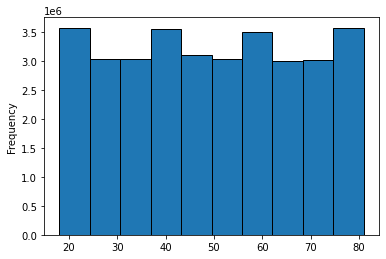

In [144]:
age_histo = cust_combo['age'].plot.hist(bins = 10, edgecolor = 'black')

In [157]:
age_histo.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histo-age_groups.png'))

# Q.7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [158]:
# Aggregating age + prices
aggr_age_price = cust_combo.groupby('age').agg({'prices' : ['min', 'mean', 'max']})

In [159]:
aggr_age_price.to_clipboard()

In [160]:
aggr_age_max_ord = cust_combo.groupby('age').agg({'max_order' : ['min', 'mean', 'max']})
aggr_age_max_ord.to_clipboard()

In [161]:
aggr_age_incm = cust_combo.groupby('age').agg({'income' : ['min', 'mean', 'max']})
aggr_age_incm.to_clipboard()

In [162]:
aggr_age_pr_ord = cust_combo.groupby('age').agg({'days_since_prior_order' : ['min', 'mean', 'max']})
aggr_age_pr_ord.to_clipboard()

In [163]:
aggr_age_ord_freq = cust_combo.groupby('age').agg({'order_freq' : ['min', 'mean', 'max']})
aggr_age_ord_freq.to_clipboard()

In [169]:
aggr_age_dept = cust_combo.groupby('age').agg({'department_id' : ['min', 'mean', 'max']})
aggr_age_dept.to_clipboard()

In [164]:
# Aggregating regions + income
aggr_reg_incm = cust_combo.groupby('regions').agg({'income' : ['min', 'mean', 'max']})
aggr_reg_incm.to_clipboard()

In [165]:
aggr_reg_price = cust_combo.groupby('regions').agg({'prices' : ['min', 'mean', 'max']})
aggr_reg_price.to_clipboard()

In [166]:
aggr_reg_max_ord = cust_combo.groupby('regions').agg({'max_order' : ['min', 'mean', 'max']})
aggr_reg_max_ord.to_clipboard()

In [167]:
aggr_reg_pr_ord = cust_combo.groupby('regions').agg({'days_since_prior_order' : ['min', 'mean', 'max']})
aggr_reg_pr_ord.to_clipboard()

In [168]:
aggr_reg_ord_freq = cust_combo.groupby('regions').agg({'order_freq' : ['min', 'mean', 'max']})
aggr_reg_ord_freq.to_clipboard()

In [170]:
aggr_reg_dept = cust_combo.groupby('regions').agg({'department_id' : ['min', 'mean', 'max']})
aggr_reg_dept.to_clipboard()

### Adding a few more crosstabs for additional insight

In [172]:
xtb_reg_spend = pd.crosstab(cust_combo['regions'], cust_combo['type_of_spender'], dropna = False)

type_of_spender,High spender,Low spender
regions,,
Midwest,156055,7447961
Northeast,108269,5620175
South,209824,10592158
West,160402,8140215


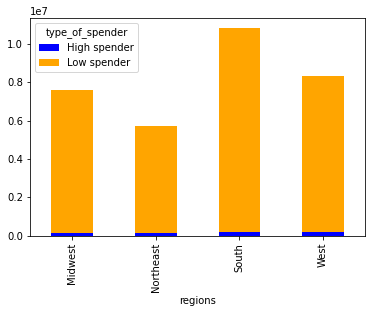

In [176]:
bar_reg_spend = xtb_reg_spend.plot.bar(stacked = True, color = ['blue', 'orange'])
xtb_reg_spend

In [184]:
bar_reg_spend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-region_spendinghabits.png'))

In [12]:
xtb_spend_freq = pd.crosstab(cust_combo['type_of_spender'], cust_combo['frequency_flag'], dropna = False)

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
type_of_spender,,,
High spender,427020,66741,140789
Low spender,21151253,3572979,7076277


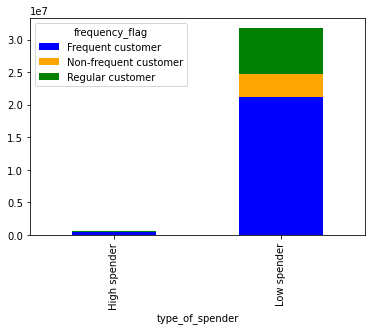

In [179]:
bar_spend_freq = xtb_spend_freq.plot.bar(stacked = True, color = ['blue', 'orange', 'green'])
xtb_spend_freq

In [185]:
bar_spend_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-spendinghabits_frequencyflag.png'))

type_of_spender,High spender,Low spender
frequency_flag,,
Frequent customer,427020,21151253
Non-frequent customer,66741,3572979
Regular customer,140789,7076277


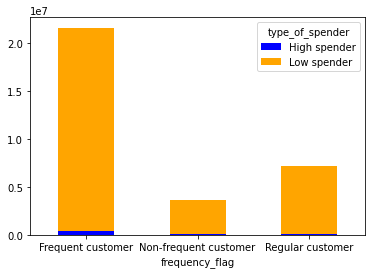

In [13]:
xtb_freq_spend = xtb_spend_freq.T
bar_spend_freq2 = xtb_freq_spend.plot.bar(stacked = True, color = ['blue', 'orange'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
xtb_freq_spend

In [186]:
bar_spend_freq2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-spendinghabits_freq2.png'))

In [182]:
xtb_tod_busy = pd.crosstab(cust_combo['order_time_of_day'], cust_combo['busiest_period_of_day'], dropna = False)

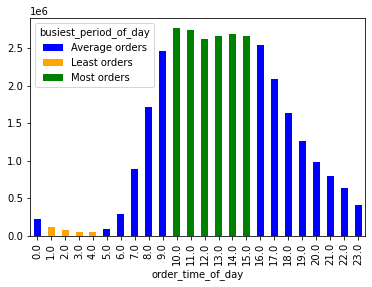

In [183]:
bar_tod_busy = xtb_tod_busy.plot.bar(stacked = True, color = ['blue', 'orange', 'green'])

In [187]:
bar_tod_busy.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-timeofday_busiestdays.png'))

In [28]:
# Crosstab for price_range and order TOD

xtb_ord_tod_price_rng = pd.crosstab(cust_combo['order_time_of_day'], cust_combo['price_range'], dropna = False)

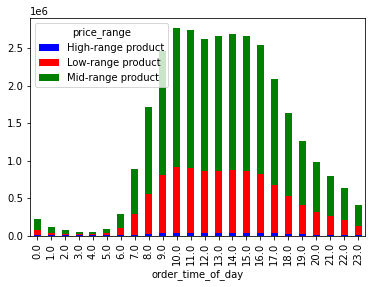

In [29]:
bar_tod_price_rng = xtb_ord_tod_price_rng.plot.bar(stacked = True, color = ['blue', 'red', 'green'])

In [31]:
# Exporting tod v. price_range as png

bar_tod_price_rng.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-timeofday_pricerange.png'))

In [ ]:
# Crosstab for family status and order TOD

xtb_ord_tod_fam = pd.crosstab(cust_combo['order_time_of_day'], cust_combo['family_status'], dropna = False)

In [34]:
# Using value_counts to prep for a product_range pie chart
prod_range_counts = cust_combo['price_range'].value_counts()

In [35]:
prod_range_counts

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range, dtype: int64

In [72]:
labels = 'Mid-range products ($5 - 15)', 'Low-range products ($5 or less)', 'High-range products (Above $15)'
sizes = prod_range_counts
explode = (0, 0, 0.3)

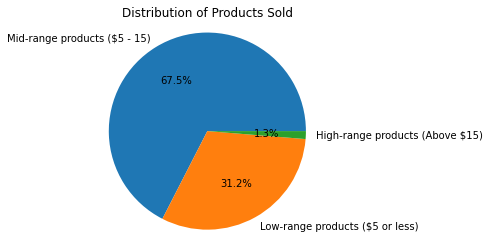

In [73]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Distribution of Products Sold')

plt.show()

In [74]:
ax1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie-prod_range_counts.png'))

In [63]:
# Crosstab for price_range and region

xtb_reg_price_rng = pd.crosstab(cust_combo['regions'], cust_combo['price_range'], dropna = False)

price_range,High-range product,Low-range product,Mid-range product
regions,,,
Midwest,97918,2372304,5127103
Northeast,73202,1792943,3856591
South,139390,3368338,7284157
West,107168,2592736,5593009


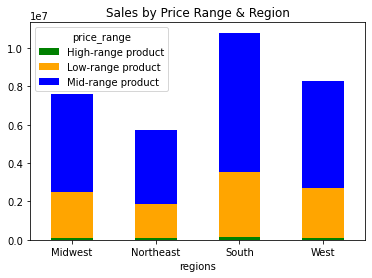

In [93]:
bar_reg_price_rng = xtb_reg_price_rng.plot.bar(stacked = True, color = ['green', 'orange', 'blue'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
bar_reg_price_rng.set_title('Sales by Price Range & Region')
xtb_reg_price_rng

In [96]:
bar_reg_price_rng.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-reg_pricerng.png'))

Text(0.5, 1.0, 'Count of Products Sold by Department ID')

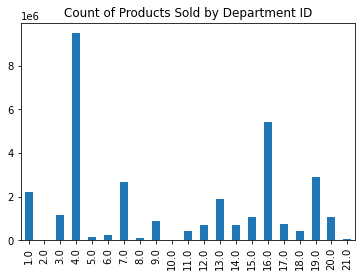

In [80]:
# Bar chart for value_counts for dept_id

bar_dept_id = cust_combo['department_id'].value_counts().sort_index().plot.bar()
bar_dept_id.set_title('Count of Products Sold by Department ID')

In [81]:
bar_dept_id.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-sales_by_deptID.png'))

Text(0.5, 1.0, 'Count of Department ID')

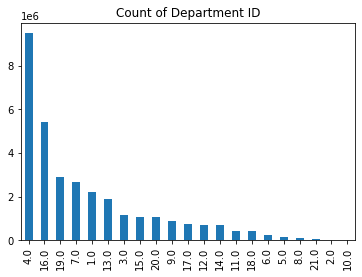

In [82]:
# Second bar chart for dept_id sorted by count

bar_dept_id_2 = cust_combo['department_id'].value_counts().plot.bar()
bar_dept_id_2.set_title('Count of Department ID')

In [83]:
bar_dept_id_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar-sales_by_deptID_2.png'))

In [97]:
# Creating count for family status to prep for pie chart

fam_stat_counts = cust_combo['family_status'].value_counts()
fam_stat_counts

married                             22777499
single                               5330885
divorced/widowed                     2774460
living with parents and siblings     1552215
Name: family_status, dtype: int64

In [98]:
label2 = 'Married', 'Single', 'Divorced/Widowed', 'Living w/ Parents/Siblings'
size2 = fam_stat_counts

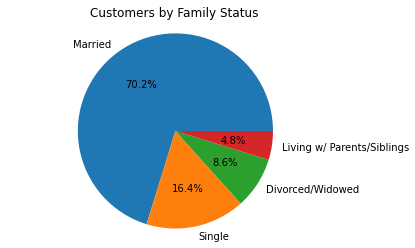

In [100]:
fig2, fam_pie = plt.subplots()
fam_pie.pie(size2, labels=label2, autopct='%1.1f%%')
fam_pie.axis('equal')
fam_pie.set_title('Customers by Family Status')

plt.show()

In [101]:
fam_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie-family_status.png'))

In [102]:
# Creating pie chart for customer loyalty

loyalty_counts = cust_combo['loyalty_flag'].value_counts()
loyalty_counts

Regular customer    15891507
Loyal customer      10294027
New customer         6249525
Name: loyalty_flag, dtype: int64

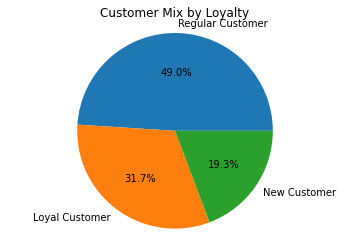

In [109]:
label3 = 'Regular Customer', 'Loyal Customer', 'New Customer'
size3 = loyalty_counts

fig3, loyal_pie = plt.subplots()
loyal_pie.pie(size3, labels=label3, autopct='%1.1f%%')
loyal_pie.axis('equal')
loyal_pie.set_title('Customer Mix by Loyalty')

plt.show()

In [110]:
loyal_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie-loyalty.png'))

In [106]:
# Creating pie chart for frequency flag

freq_counts = cust_combo['frequency_flag'].value_counts()
freq_counts

Frequent customer        21578273
Regular customer          7217066
Non-frequent customer     3639720
Name: frequency_flag, dtype: int64

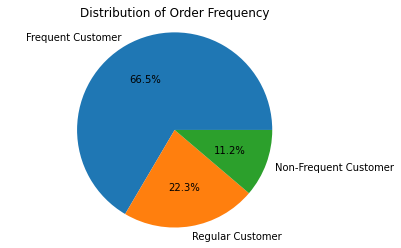

In [112]:
label4 = 'Frequent Customer', 'Regular Customer', 'Non-Frequent Customer'
size4 = freq_counts

fig4, freq_pie = plt.subplots()
freq_pie.pie(size4, labels=label4, autopct='%1.1f%%')
freq_pie.axis('equal')
freq_pie.set_title('Distribution of Order Frequency')

plt.show()

In [113]:
freq_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie-frequency.png'))

# Exporting df for future use

In [14]:
cust_combo.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_combo_df.pkl'))